# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом по классификации emoji из тг. Можете посмотреть самостоятельно на картинки, которые есть в датасете. В нём 100 классов и около 100 картинок на каждый класс. Классы пронумерованы кодом смайлика, к которому относятся элементы класса. Скачать датасет можно вот [тут](https://disk.yandex.ru/d/elNF0DS94o2GVA).

Структура датасета -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.

__Задание__. Необходимо выполнить два задания

1) Добейтесь accuracy **на валидации не менее 0.24**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов

2) Добейтесь accuracy **на валидации не менее 0.34**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете.

Ваш код обязательно должен проходить все `assert`'ы ниже.

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.24)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.24) / 0.1)` для второго. Оценка округляется до десятых по арифметическим правилам.


__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе.

Good luck & have fun! :)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install wandb
!pip3 install pytorch_lightning==1.9.0 torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.8/825.8 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 48.0 MB/s eta 0:00:00


**✨ Внимание ✨**

В этом домашнем задании предлагается использовать библиотеку `pytorch_lightning`. Доступ к ее [документации](https://lightning.ai/docs/pytorch/stable/) заблокирован с территории РФ. Вы можете:

1. Получить к ней доступ с помощью VPN.

2. Собрать документацию самостоятельно. Для этого склонируйте [github-репозиторий](https://github.com/Lightning-AI/lightning/tree/master), запустите в нем терминал (на windows – git bash) и выполните команды:

```shell
git submodule update --init --recursive
make docs
```
После этого откройте появившийся файл `docs/build/html/index.html`. Для работы команд в вашем окружении должен быть `pip`. Полная инструкция [по ссылке](https://github.com/Lightning-AI/lightning/tree/master/docs).

3. Гуглить `<error message> pytorch lightning` или `<how to do this> pytorch lightning`. Stack overflow на территории РФ все еще доступен 😉

4. Не пользоваться `pytorch_lightning` и написать цикл обучения модели самостоятельно. Например, по аналогии с функцией `fit` из [семинара 4](https://github.com/hse-ds/iad-deep-learning/blob/master/2023/seminars/04.%20Optim%20%26%20Lightning/04_Optim%26Lightning_solution.ipynb).

In [3]:
# Возможно ниже будет не очень работать WandbLogger с первого раза, перезапустите kernel тетрадки
import wandb

wandb.login()

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [4]:
import math
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from pytorch_lightning.loggers import WandbLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchmetrics.functional import accuracy
from torchvision.datasets import ImageFolder
from tqdm import tqdm

import pandas as pd
from IPython.display import clear_output
import seaborn as sns
from torchvision.transforms import v2

# You may add any imports you need

In [5]:
def seed_everything(seed):
    # Фискирует максимум сидов.
    # Это понадобится, чтобы сравнение оптимизаторов было корректным
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


seed_everything(123456)

In [6]:
# Скачиваем датасет.
!wget -O dataset.zip https://github.com/aeksin/datasets/releases/download/new9/dataset.zip
!7z e dataset.zip
!unzip /content/train.zip -d /content/dataset
!unzip /content/val.zip -d /content/dataset

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: /content/dataset/train/U+1F92C/CAACAgUAAxUAAWSdjdIvVTUiQNzLYnI1VA7135DnAAKHDQACaFKkAXQgn0FsnbrwLwQ.png  
  inflating: /content/dataset/train/U+1F92C/CAACAgUAAxUAAWSdjhQoiw1TSUpetpTbfA9XeWr6AAIFAwAC2chQVdlmTBMlQm9sLwQ.png  
  inflating: /content/dataset/train/U+1F92C/CAACAgUAAxUAAWSdjhS6FecAAUYlj0A9D054Qq-FnwACaQIAAiS_WVVYpe2cLuQxri8E.png  
  inflating: /content/dataset/train/U+1F92C/CAACAgUAAxUAAWSdjhTxjphHn_hgW0_qJO0zcPgZAALuAwACyBxIVBhsA2eUWrSpLwQ.png  
  inflating: /content/dataset/train/U+1F92C/CAACAgUAAxUAAWSdjK4w3ylr-gS4wRdlx_0E655MAAJEAgADQJBXOjW1wxhSa74vBA.png  
  inflating: /content/dataset/train/U+1F92C/CAACAgUAAxUAAWSdjKLmiV1OBHCZMPsqlrqj591GAAJWBQACMTO4VEVRPUzf34acLwQ.png  
  inflating: /content/dataset/train/U+1F92C/CAACAgUAAxUAAWSdjLhh7dB5DOYMGe96d2qoraf6AAIwAgAC2txxCE4n2gqxxE-FLwQ.png  
  inflating: /content/dataset/train/U+1F92C/CAACAgUAAxUAAWSdjmIv_yEw_4O5aFTrdmZ2niS5AAIKAAPbjWs0FMCxp9m3Lx

## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.
2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)

```
  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True)

  trainer.tune(module, train_dataloader, eval_dataloader)

  trainer.fit(module, train_dataloader, eval_dataloader))
```



3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)
4. Подбор архитектуры модели.
5. Можно написать свою модель руками в классе YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать:

  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`
  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)
6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)
7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали.
 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)
 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

### Подготовка данных

In [7]:
seed_everything(123456)

train_transform = v2.Compose([
        v2.RandomCrop(128),
        v2.RandomHorizontalFlip(),
        v2.RandomVerticalFlip(),
        #v2.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
        #v2.RandomRotation(20),
        #v2.RandomInvert(), # Доп.
        #v2.RandomAdjustSharpness(sharpness_factor=2), # Доп.
        v2.ToTensor(),
        v2.Normalize([0.4819, 0.4437, 0.4263], [0.3064, 0.2931, 0.2885]) # mean и std были расчитаны вручную для обучающей выборки.
    ])
val_transform = v2.Compose([
        v2.CenterCrop(128),
        v2.ToTensor(),
        v2.Normalize([0.4819, 0.4437, 0.4263], [0.3064, 0.2931, 0.2885]) # mean и std были расчитаны вручную для обучающей выборки.
    ])

train_dataset = ImageFolder('/content/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/val', transform=val_transform)


train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [8]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


In [ ]:
# Найдем средние и дисперсии

mean = torch.zeros(3)
std = torch.zeros(3)

for images, _ in tqdm(train_dataloader):
    # batch_size, channels, height, width
    batch_size = images.shape[0]
    images = images.view(batch_size, images.shape[1], -1)
    mean += images.mean(dim=2).sum(dim=0)
    std += images.std(dim=2).sum(dim=0)

mean /= len(train_dataloader.dataset)
std /= len(train_dataloader.dataset)
print()
print(f'Mean: {mean}')
print(f'Std: {std}')

 11%|█▏        | 41/357 [00:16<02:07,  2.49it/s]


KeyboardInterrupt: 

### Посмотрим на картиночки

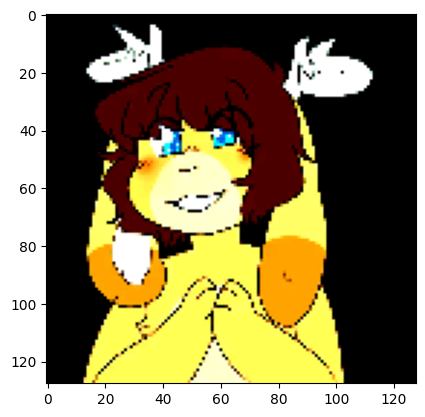

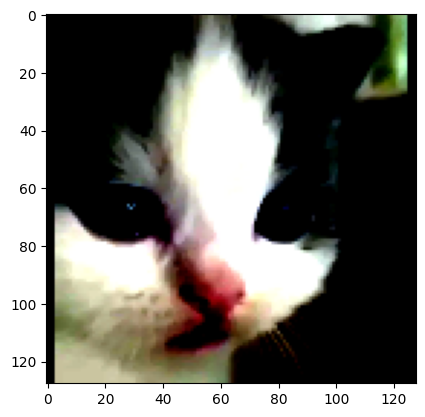

In [ ]:
for batch in val_dataloader:
    images, class_nums = batch
    plt.imshow(images[5].permute(1, 2, 0))
    plt.show()
    plt.imshow(images[19].permute(1, 2, 0))
    plt.show()
    break

## Задание 1.

5 баллов
Добейтесь accuracy на валидации не менее 0.24. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.


Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались)
4. Посмотреть ноутбуки прошедших семинаров и создайте из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте не предобученную)

In [9]:
# Гиперпараметры.
hyperparameters = {
    'learning_rate': 0.001,
    'num_epochs': 19
}

In [10]:
seed_everything(123456)

from torchvision.models import resnet18

device = "cuda:0" if torch.cuda.is_available() else "cpu"

NUM_CLASSES = len(train_dataset.classes)

class YourNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.resnet = torchvision.models.resnet18(weights=None, num_classes=NUM_CLASSES).to(device)
        # Задаем функцию потерь, тензор таргетов и тензор предсказаний.
        self.loss_func = torch.nn.CrossEntropyLoss()
        self.targets = torch.Tensor()
        self.preds = torch.Tensor()
        self.acc = 0.0
        pass

    def _forward(self, x):
        # runs the Neural Network
        return self.resnet(x)

    def forward(self, images, target=None):
        output = self._forward(images)

        # get accuracy score and save it to self.acc
        if target is not None:
            loss = self.loss_func(output, target)

            self.targets = torch.cat((self.targets, target.cpu()), 0)
            pred = torch.argmax(output, dim=-1)
            self.preds = torch.cat((self.preds, pred.cpu()), 0)

            self.acc = accuracy(self.preds.long(), self.targets.long(), task='multiclass', num_classes=NUM_CLASSES)

        return loss if target is not None else output

    def get_accuracy(self, reset=False):
        # return accuracy by all values till now
        if reset:
            self.targets = torch.Tensor()
            self.preds = torch.Tensor()
        return self.acc

### Тренировочный класс lightning

In [11]:
seed_everything(123456)

class YourModule(pl.LightningModule):
    def __init__(self, model, learning_rate):
        super().__init__()
        self.model = model
        self.learning_rate = learning_rate

    def forward(self, x):
        result = self.model(x)
        return result

    def configure_optimizers(self):
        lambda_func = lambda epoch: 0.975**epoch
        optimizer = torch.optim.AdamW(self.parameters(), lr=self.learning_rate)
        scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda_func)
        return [optimizer], [scheduler]

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        images = images.to(self.device)
        target = target.to(self.device)
        loss = self.model(images, target)
        self.log("train_loss", loss, prog_bar=True, on_step=True, on_epoch=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        images = images.to(self.device)
        target = target.to(self.device)
        loss = self.model(images, target)
        self.log("val_loss", loss, prog_bar=True, on_step=True, on_epoch=True)

    def on_validation_epoch_start(self):
        self.log("train_accuracy_epoch", self.model.get_accuracy(reset=True), on_epoch=True)

    def on_validation_epoch_end(self):
        self.log("val_accuracy_epoch", self.model.get_accuracy(reset=True), on_epoch=True)

In [12]:
seed_everything(123456)

wandb.init(project="homework-2", name="stupid_aug-batch128-epoch10-resnet18-model", config=hyperparameters)
wandb_logger = WandbLogger(log_model='all', project="homework-2", name="stupid_aug-batch128-epoch10-resnet18-model") # какие возможности дает с pytorch_lightning https://docs.wandb.ai/guides/integrations/lightning

model = YourNet().to(device)
module = YourModule(model, learning_rate=hyperparameters['learning_rate'])

wandb: Currently logged in as: l4sthope (l4sthope-higher-school-of-economics). Use `wandb login --relogin` to force relogin


/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loggers/wandb.py:395: UserWarning: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
  rank_zero_warn(


In [13]:
seed_everything(123456)

trainer = pl.Trainer(accelerator="gpu", max_epochs=hyperparameters['num_epochs'], auto_lr_find=True, logger=wandb_logger)
trainer.tune(module, train_dataloader, val_dataloader)
trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=100` reached.
INFO:pytorch_lightning.tuner.lr_finder:Learning rate set to 0.0007585775750291836
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_7e4c1149-18f4-4566-8498-8476ea6d8584.ckpt
/usr/local/lib/python3.10/dist-packages/lightning_fabric/utilities/cloud_io.py:48: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=19` reached.


In [14]:
trainer.save_checkpoint("your_model_checkpoint.ckpt")
wandb.finish()

epoch,▁▁▁▁▁▂▂▂▃▃▃▃▃▃▄▄▄▄▅▅▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇█████
train_accuracy_epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▅▅▆▆▇█
train_loss_epoch,██▇▇▇▇▆▆▆▅▅▅▄▄▃▃▂▂▁
train_loss_step,█▇▇▇▇▇▆▇▆▆▆▅▆▆▅▅▄▆▅▅▅▅▅▅▄▃▄▅▄▄▄▃▃▃▂▂▃▂▂▁
trainer/global_step,▁▁▂▂▁▁▁▁▂▂▂▂▂▆▂▆▂█▂▃▃▃▃▃▃▃▃▃▃▃▃▃▃▃▄▄▄▄▄▄
val_accuracy_epoch,▂▁▂▃▃▃▄▄▄▅▆▆▆▆▇▇▇▆█
val_loss_epoch,▇▆▅▄▄▃▂▃▂▁▁▁▁▁▃▃▅▆█
val_loss_step,█▂▅▂▅▄█▇▅▅▇▇▆▂▇█▇▃▃▄▁▆▄▄▇▃▁▅▄▅▃▇▃▃▅▆▄▁▁▄
epoch,18
train_accuracy_epoch,0.52571
train_loss_epoch,1.71848


In [ ]:
# Продолжение обучения
#trainer = pl.Trainer(accelerator="gpu", max_epochs=hyperparameters['num_epochs'], auto_lr_find=True, logger=WandbLogger(log_model='all', project="homework-2", name="batch32-model"), resume_from_checkpoint="your_model_checkpoint.ckpt")
#trainer.fit(module, train_dataloader, val_dataloader)

### Валидация результатов задания

In [15]:
seed_everything(123456)

def evaluate_task(model, test_dataloader, device="cuda:0"):
    model = model.to(device)
    model.eval()
    model.get_accuracy(reset=True)
    acc = 0.0
    for images, labels in tqdm(test_dataloader):
        images, labels = images.to(device), labels.to(device)
        with torch.no_grad():
            loss = model(images, labels)
            acc_batch = model.get_accuracy(reset=True)
        acc += acc_batch * labels.shape[0]
    acc = acc / len(test_dataloader.dataset)
    return acc

In [16]:
seed_everything(123456)

result_accuracy = evaluate_task(model, val_dataloader)
print()
print(f"Validation Accuracy: {result_accuracy}")
print(f"Оценка за это задание составит {np.clip(5 * result_accuracy / 0.24, 0, 5):.2f} баллов")

100%|██████████| 79/79 [00:04<00:00, 18.56it/s]


Validation Accuracy: 0.23960000276565552
Оценка за это задание составит 4.99 баллов


## Задание 2

5 баллов
Добейтесь accuracy на валидации не менее 0.34. В этом задании делать ресайз и использовать претрейн можно.

Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры лучше используйте Adam c параметрами по умолчанию как стартовую точку.
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались или можете пойти дальше).
4. Попробуйте сначала посмотреть качество исходной модели без дообучения, сохраните как baseline. Отсюда поймете какие слои нужно дообучать.
5. Посмотреть все ноутбуки прошедших семинаров и создайте из них что-то общее. Семинарских тетрадок хватит сверх

In [ ]:
seed_everything(123456)

train_transform = v2.Compose([
        v2.RandomResizedCrop(224),
        v2.ColorJitter(hue=0.05, saturation=0.05),
        v2.RandomHorizontalFlip(),
        v2.RandomVerticalFlip(),
        v2.ToTensor(),
        v2.Normalize([0.4819, 0.4437, 0.4263], [0.3064, 0.2931, 0.2885]) # mean и std были расчитаны вручную для обучающей выборки.
    ])
val_transform = v2.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        v2.ToTensor(),
        v2.Normalize([0.4819, 0.4437, 0.4263], [0.3064, 0.2931, 0.2885]) # mean и std были расчитаны вручную для обучающей выборки.
    ])

train_dataset = ImageFolder('/content/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/val', transform=val_transform)


train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [ ]:
# Гиперпараметры.
hyperparameters = {
    'learning_rate': 0.0001,
    'num_epochs': 19
}

### Модель (или просто импортируйте предобученную)

In [ ]:
seed_everything(123456)

from torchvision.models import resnet18

device = "cuda:0" if torch.cuda.is_available() else "cpu"

NUM_CLASSES = len(train_dataset.classes)

class YourNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.resnet = torchvision.models.resnet18(pretrained=True).to(device)
        # Замораживаем слои (кроме последнего сверточного блока и полносвязного слоя).
        for param in self.resnet.parameters():
            param.requires_grad = False
        for param in self.resnet.layer4.parameters():
            param.requires_grad = True
        for param in self.resnet.fc.parameters():
            param.requires_grad = True
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, NUM_CLASSES)

        # Задаем функцию потерь, тензор таргетов и тензор предсказаний.
        self.loss_func = torch.nn.CrossEntropyLoss()
        self.targets = torch.Tensor()
        self.preds = torch.Tensor()
        self.acc = 0.0
        pass

    def _forward(self, x):
        # runs the Neural Network
        return self.resnet(x)

    def forward(self, images, target=None):
        output = self._forward(images)

        # get accuracy score and save it to self.acc
        if target is not None:
            loss = self.loss_func(output, target)

            self.targets = torch.cat((self.targets, target.cpu()), 0)
            pred = torch.argmax(output, dim=-1)
            self.preds = torch.cat((self.preds, pred.cpu()), 0)

            self.acc = accuracy(self.preds.long(), self.targets.long(), task='multiclass', num_classes=NUM_CLASSES)

        return loss if target is not None else output

    def get_accuracy(self, reset=False):
        # return accuracy by all values till now
        if reset:
            self.targets = torch.Tensor()
            self.preds = torch.Tensor()
        return self.acc

### Тренировочный класс lightning

In [ ]:
seed_everything(123456)

class YourModule(pl.LightningModule):
    def __init__(self, model, learning_rate):
        super().__init__()
        self.model = model
        self.learning_rate = learning_rate

    def forward(self, x):
        result = self.model(x)
        return result

    def configure_optimizers(self):
        lambda_func = lambda epoch: 0.975**epoch
        optimizer = torch.optim.AdamW(self.parameters(), lr=self.learning_rate)
        scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda_func)
        return [optimizer], [scheduler]

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        images = images.to(self.device)
        target = target.to(self.device)
        loss = self.model(images, target)
        self.log("train_loss", loss, prog_bar=True, on_step=True, on_epoch=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        images = images.to(self.device)
        target = target.to(self.device)
        loss = self.model(images, target)
        self.log("val_loss", loss, prog_bar=True, on_step=True, on_epoch=True)

    def on_validation_epoch_start(self):
        self.log("train_accuracy_epoch", self.model.get_accuracy(reset=True), on_epoch=True)

    def on_validation_epoch_end(self):
        self.log("val_accuracy_epoch", self.model.get_accuracy(reset=True), on_epoch=True)

In [ ]:
seed_everything(123456)

wandb.init(project="homework-2", name="pretrained-model", config=hyperparameters)
wandb_logger = WandbLogger(log_model='all', project="homework-2", name="pretrained-model") # какие возможности дает с pytorch_lightning https://docs.wandb.ai/guides/integrations/lightning

model_pretrained = YourNet().to(device)
module_pretrained = YourModule(model_pretrained, learning_rate=hyperparameters['learning_rate'])

wandb: Currently logged in as: l4sthope (l4sthope-higher-school-of-economics). Use `wandb login --relogin` to force relogin


/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loggers/wandb.py:395: UserWarning: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
  rank_zero_warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /

In [ ]:
seed_everything(123456)

trainer = pl.Trainer(accelerator="gpu", max_epochs=hyperparameters['num_epochs'], auto_lr_find=True, logger=wandb_logger)
trainer.tune(module_pretrained, train_dataloader, val_dataloader)
trainer.fit(module_pretrained, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=100` reached.
INFO:pytorch_lightning.tuner.lr_finder:Learning rate set to 0.0009120108393559097
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_3e35ad93-44f1-4498-8e78-05b3f0f8b1bf.ckpt
/usr/local/lib/python3.10/dist-packages/lightning_fabric/utilities/cloud_io.py:48: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/call.py:48: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


### Валидация результатов задания

In [ ]:
model = model_pretrained

accuracy = evaluate_task(model, val_dataloader)
print(f"Оценка за это задание составит {np.clip(5 * (accuracy - 0.24) / 0.1, 0, 5):.2f} баллов")


100%|██████████| 79/79 [00:08<00:00,  8.80it/s]


Оценка за это задание составит 3.78 баллов


# Отчёт об экспериментах

текст писать тут (или ссылочку на wandb/любой трекер экспреиментов) для каждого задания, то есть не обязательно именно тут рисовать графики, если вы используете готовые трекеры/мониторинги ваших моделей.

Все методики по улучшению качества моделей брались либо из семинарских тетрадок, либо из документации с сайта https://pytorch.org. В обоих моделях я начинал с подбора размера батча и на удивление мне сразу попался вариант, которым я остался доволен - 128 (сравнил с 256 и 32, оказался лучшим). Что касается шага обучения, то так как я указывал в Trainer auto_lr_find=True, то не особо думал над этим. Для первой модели я сразу решил, что буду использовать готовую необученную модель resnet18 с измененным выходным слоем. Поэтому единственное, с чем я мог позабавиться, была аугментация. Я пытался пробовать разные дополнительные вещи, такие как блюр, повороты, инвресии, но методом проб и ошибок оказалось, что лучше было остановиться на простом варианте с кропом и ресайзом до исходного размера, нормализацией по предварительно посчитанным mean и std и также отражениям по горизонтали и вертикали. Благодаря этому я смог добиться accuracy=0.2396. Важно отметить, что в обоих моделях я остановился на оптимизаторе AdamW (потому что он крутой) и scheduler LambdaLR (он хорошо сочетается с Адамом).  Во второй модели я очевидно добавил веса в resnet18 и дальше начал думать. Решил для веселья добавить в аугментацию работу с ресайзом (ну раз разрешают, значит это выгодно) и игру с цветом. Изучив baseline с просто обученным resnet-ом я понял, что оставлять все веса модели замороженными хорошего результата добиться не получится. Добавление новых слоев в конец также не поспособствовало улучшению. Тогда я решил разморозить в resnet еще и последний сверточный блок, чтобы число обучаемых весов увеличилось. Это продемонстрировало достойный результат. Проведя еще несколько не особенно значительных экспериментов я смог выбить accuracy>0.3156 (не успел дообучить и прервал после 13 эпох: грустно, но вкусно).

Я не совсем понял, как правильно поделиться графиками из wandb.ai, надеюсь, что откроется (если нет, то напишите пожалуйста в тг https://t.me/l4sthope, вроде как можно пошерить если добавить в команду): https://wandb.ai/l4sthope-higher-school-of-economics/homework-2